In [1]:
import cymetric as cym
from cymetric import graphs as cgr
from cymetric import timeseries as tm

import seaborn as sns
import pandas as pd
import pyne

In [2]:
db = cym.dbopen('source1-sink1.sqlite')
ev = cym.Evaluator(db=db)

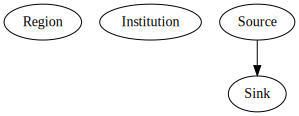

In [3]:
cgr.flow_graph(ev)

In [4]:
trs = tm.transactions(ev, senders = ['Source'])
trs.head(8)

,Time,Mass
0,0,2.0
1,1,2.0
2,2,2.0
3,3,2.0
4,4,2.0
5,5,2.0
6,6,2.0
7,7,2.0


### What is the total mass going between the source and sink over the simulation?

In [5]:
total_mass_transacted = trs.sum(axis=0)
total_mass_transacted["Mass"]

100.0

### 12 time steps is a year, the annual mass throughput for the first year is 

In [6]:
first_year = sum([trs.loc[month][1] for month in range(0,12)])
first_year

24.0

### What is the average mass transacted over a single time step?

In [25]:
average_mass_transacted = trs.mean(axis=0)
average_mass_transacted["Mass"]

1.6666666666666667

### What is the total mass transacted?

In [24]:
trs.loc[trs.Mass==0, 'Mass'].index[0]

50

<AxesSubplot:xlabel='Time'>

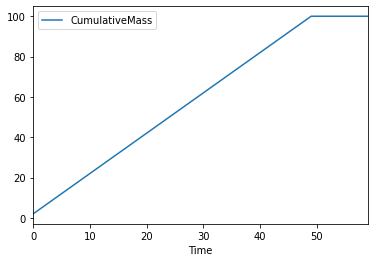

In [28]:
trs['CumulativeMass'] = trs["Mass"].cumsum()
trs.plot(x='Time', y='CumulativeMass')

### U-235 mass

<AxesSubplot:xlabel='Time'>

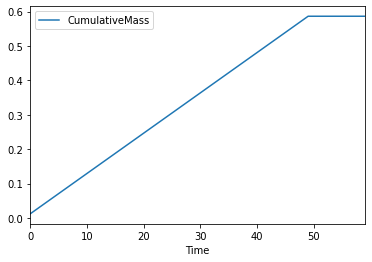

In [32]:
U235_m = tm.transactions(ev, receivers=['Sink'], nucs=['92235'])
U235_m['CumulativeMass'] = U235_m["Mass"].cumsum()

U235_m.plot(x='Time', y='CumulativeMass')